<a href="https://colab.research.google.com/github/AdityaKr015/ML-Project-Self-Driving-Car-Road-signs-object-detection-/blob/main/Road_Sign_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A Deep Learning Road Sign Detection Model**

Import ultralytics(YOLO),clear out the outputs and then   checks if ultralytics is installed or not

In [1]:
!pip install ultralytics
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/112.6 GB disk)


Install YOLOV8 s model (i.e. small model)

In [4]:
import ultralytics
from ultralytics import YOLO
model = YOLO("yolov8s.pt")

Makes a new directory called RoadsignDetection

In [5]:
!mkdir RoadsignDetection

path='/content/RoadsignDetection'

Change directory to RoadsignDetection

In [6]:
import os
os.chdir("/content/RoadsignDetection")

Installs roboflow libraby and importing out dataset.

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AALOD3IeCnQtf934sL40")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


Train the model for 10 epoch

In [9]:
!yolo train data=/content/RoadsignDetection/Self-Driving-Cars-6/data.yaml model=yolov8s.pt epochs=10  imgsz=640

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/RoadsignDetection/Self-Driving-Cars-6/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspe

List the directory of trained model results data

In [11]:
!ls '/content/RoadsignDetection/runs/detect/train2'

args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg


Display the confusion matrix

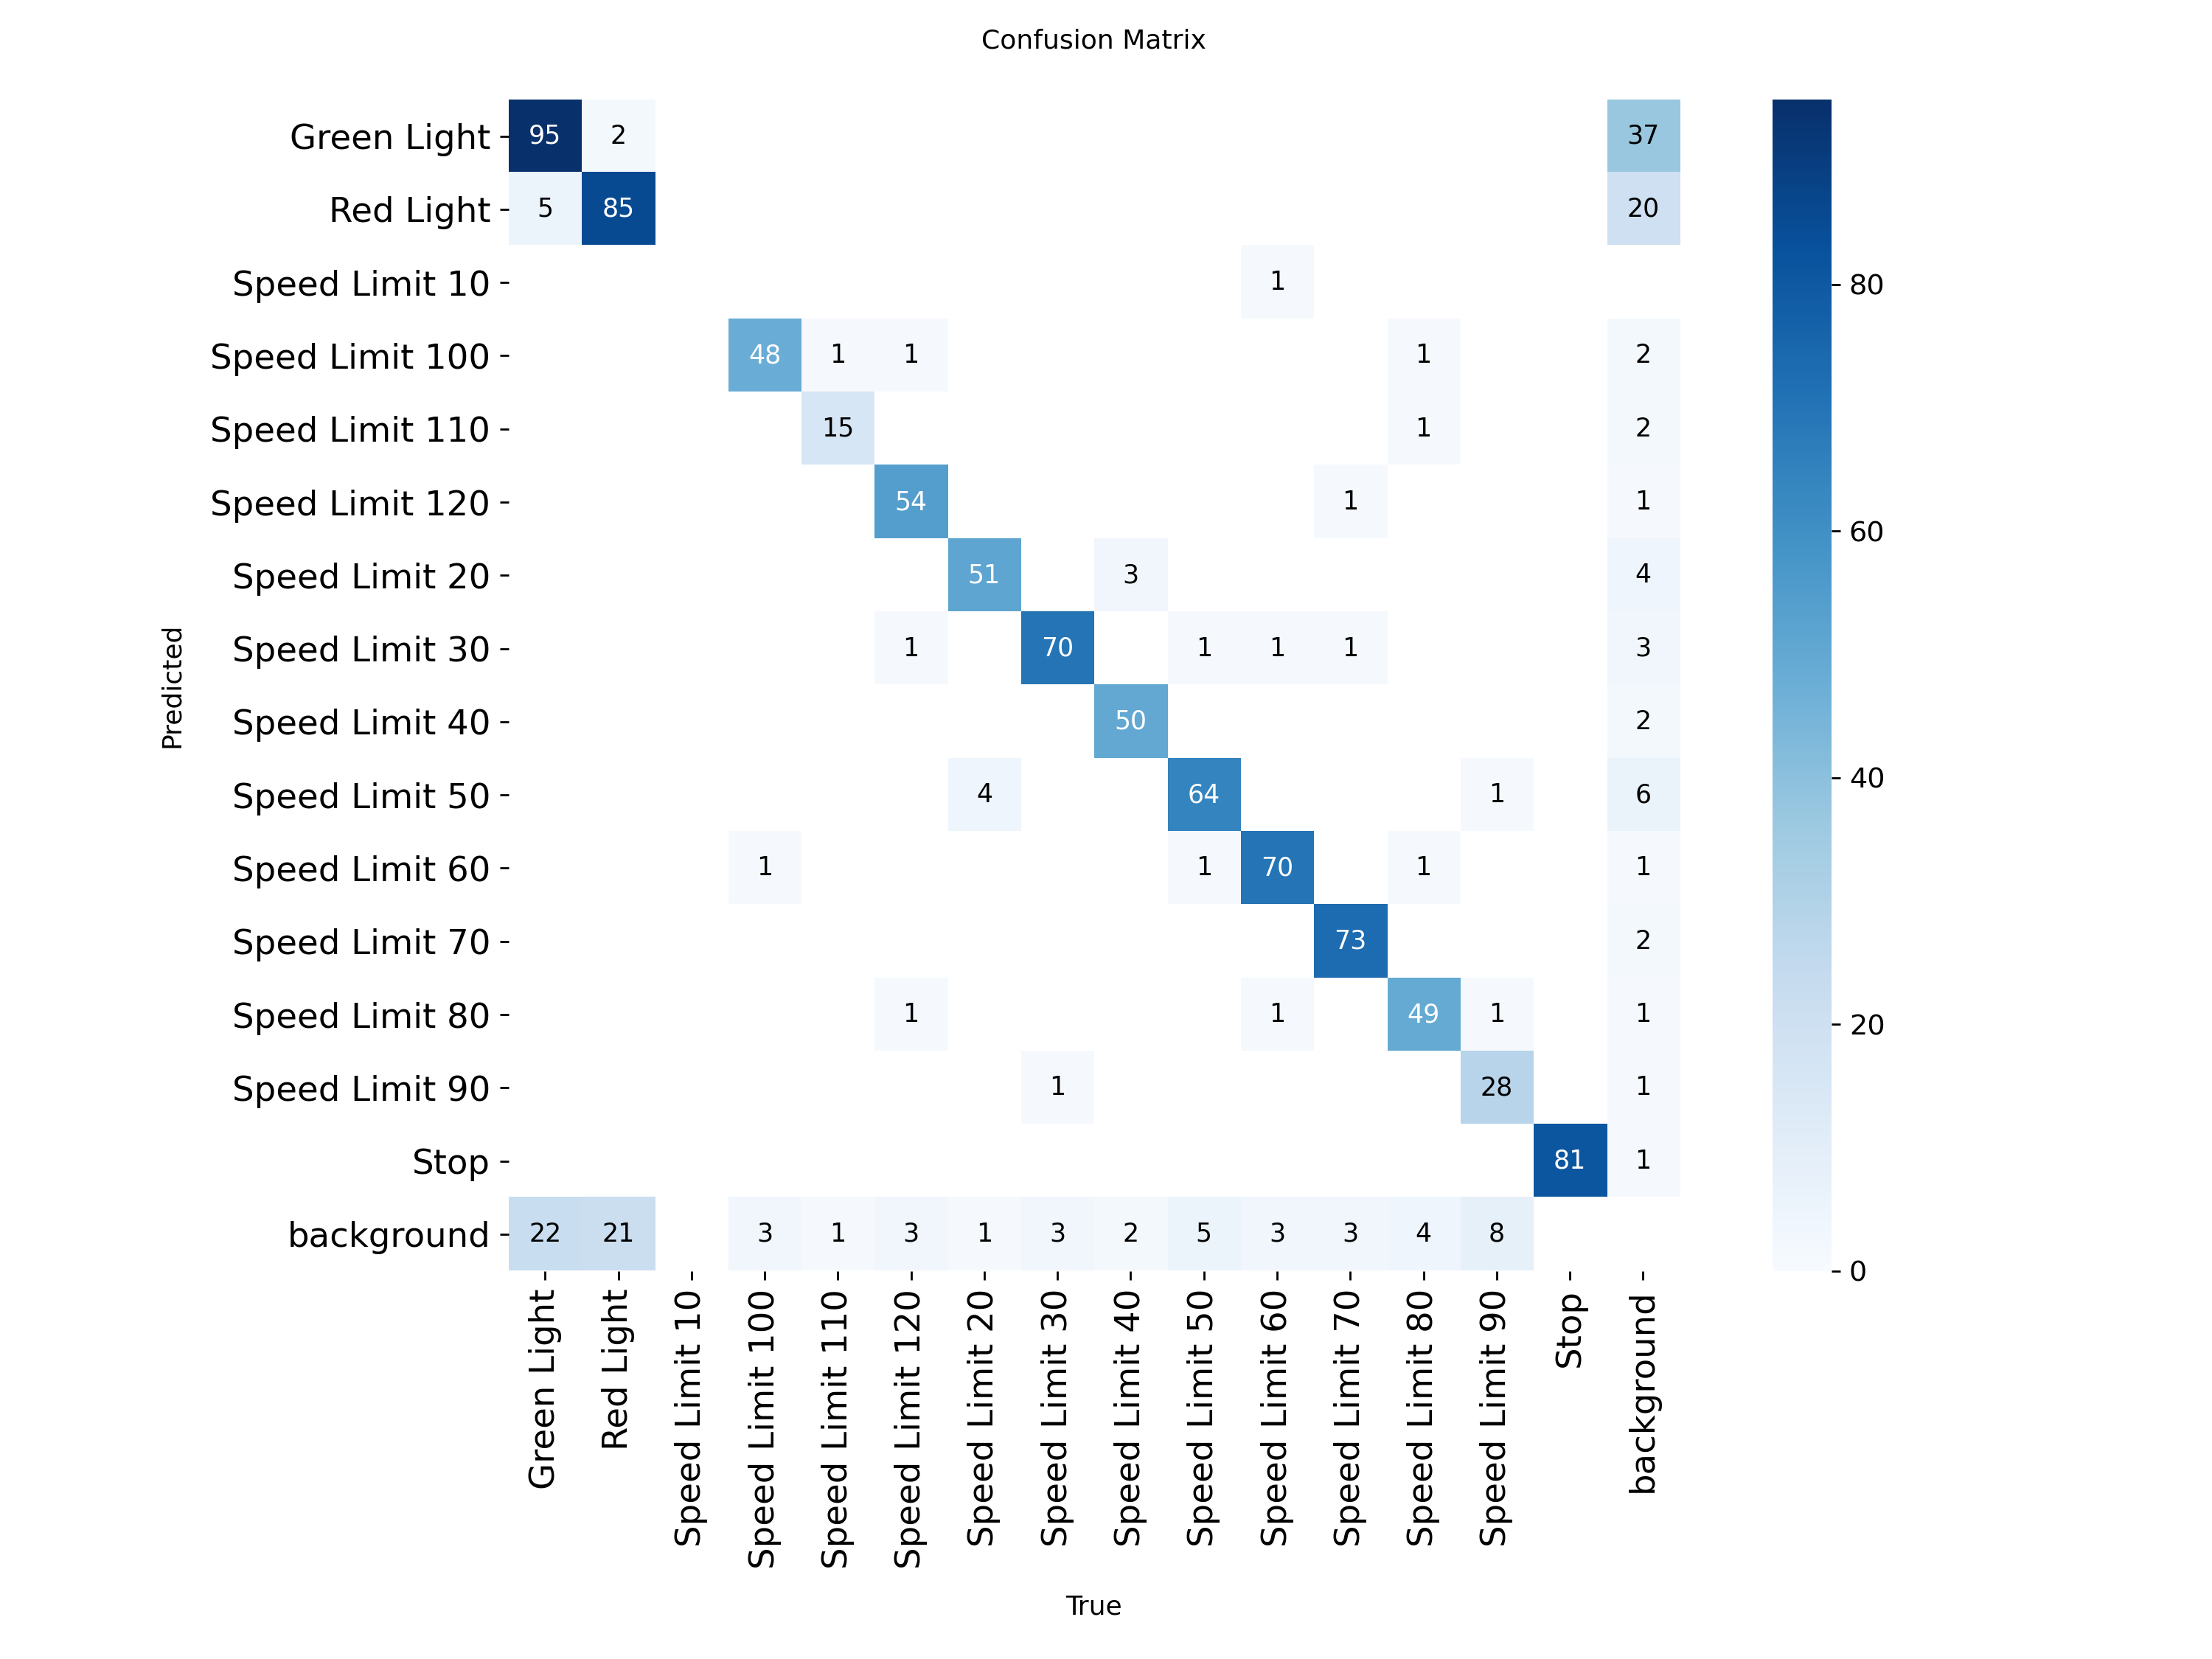

In [12]:
from IPython.display import Image,display
resultData=('/content/RoadsignDetection/runs/detect/train2')
Image(filename=f'{resultData}/confusion_matrix.png')


Display the results

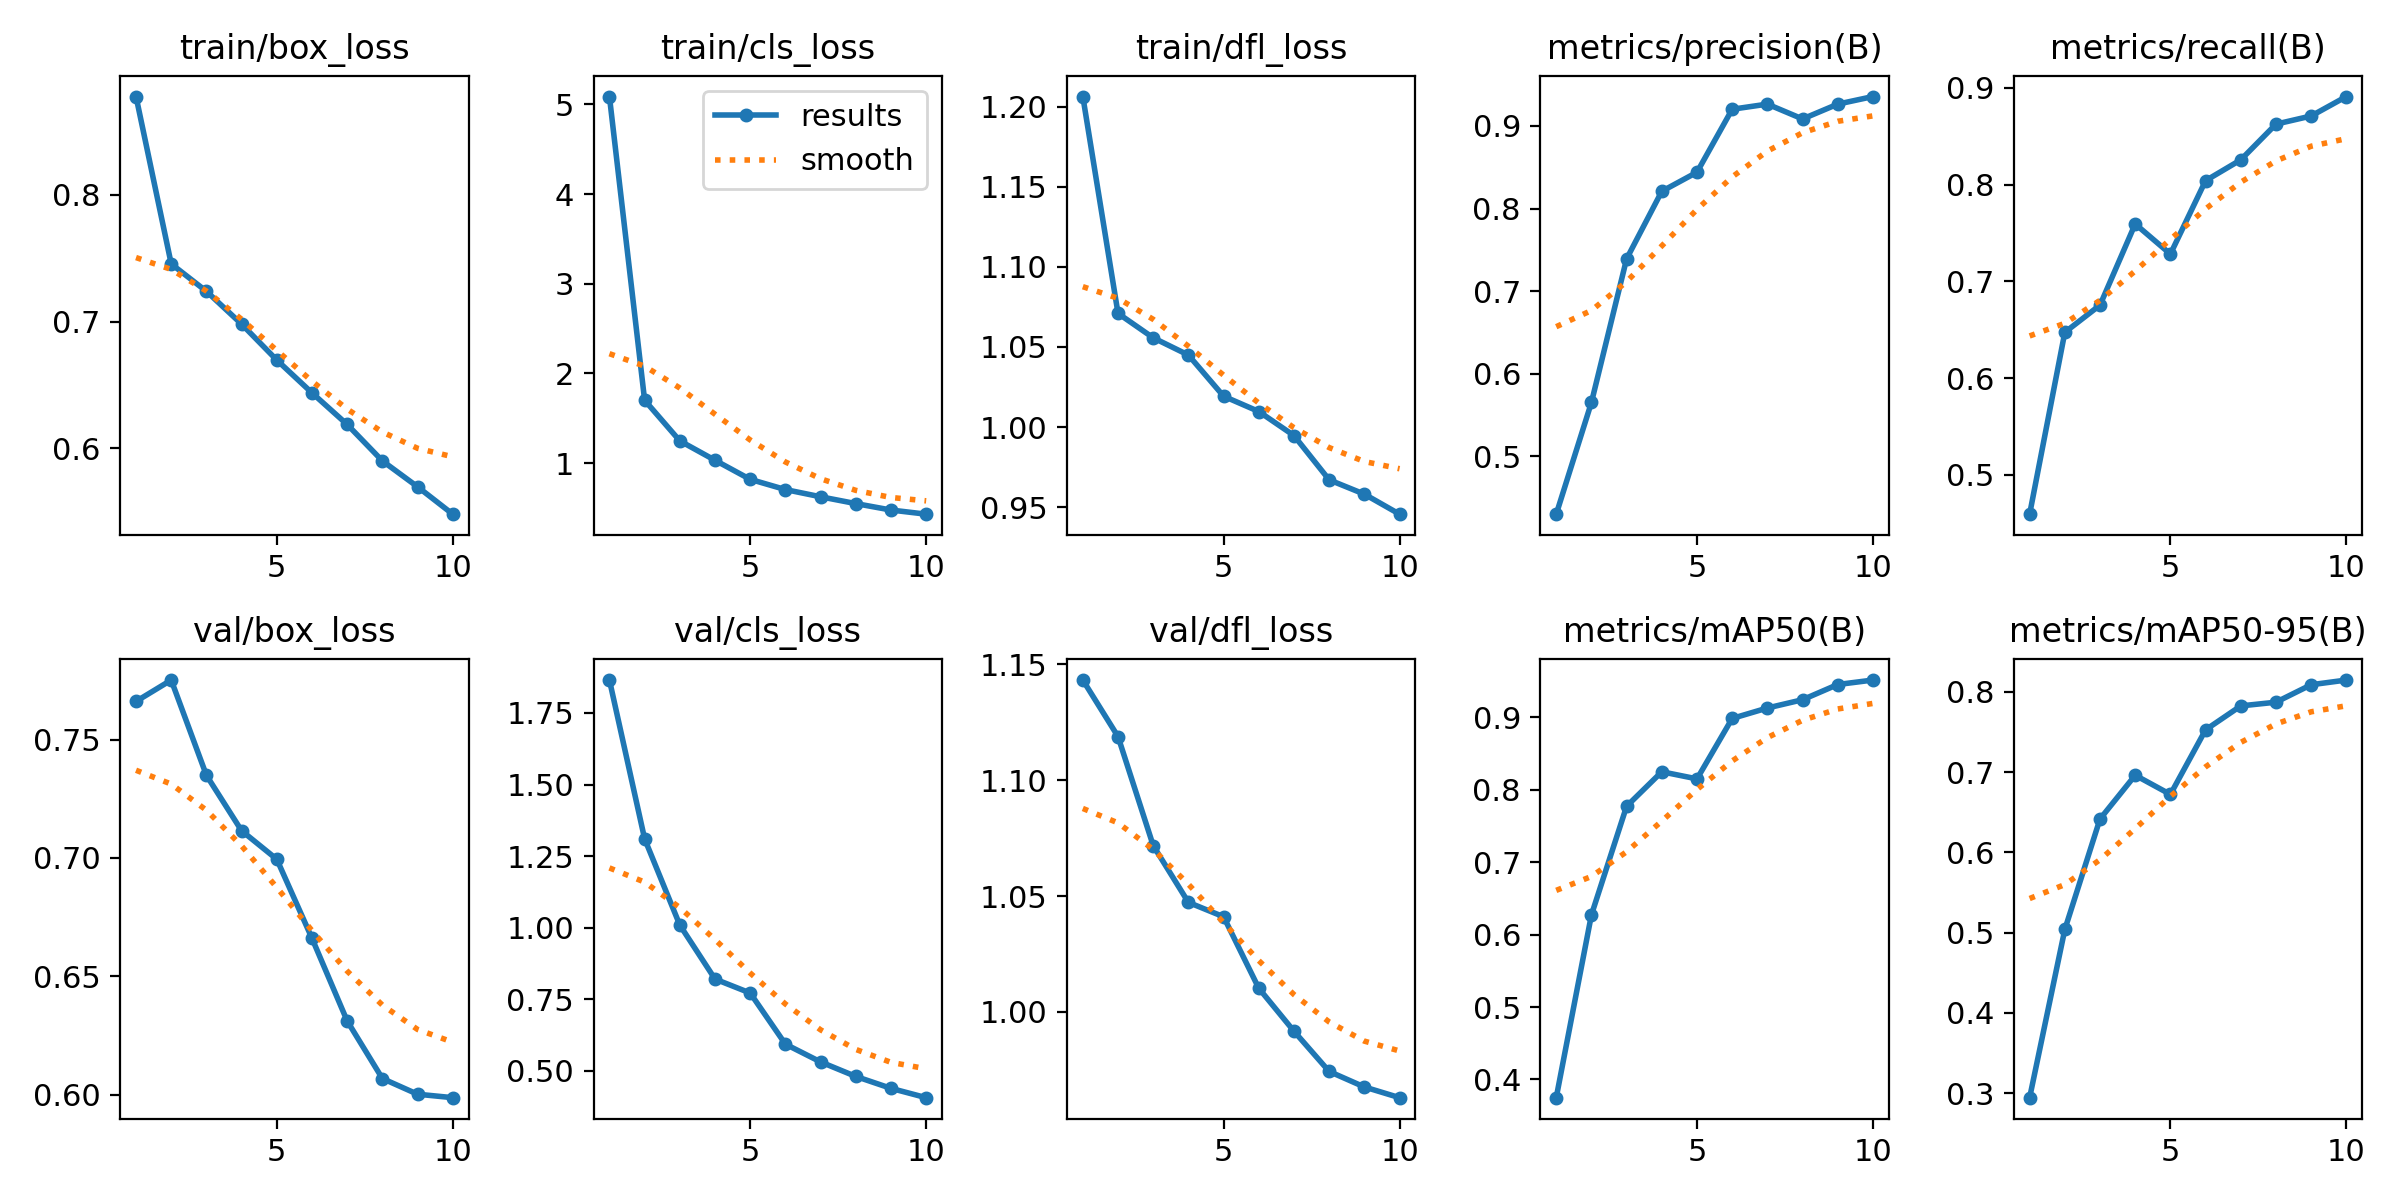

In [13]:
resultData=('/content/RoadsignDetection/runs/detect/train2')
Image(filename=f'{resultData}/results.png')

Displays the results csv file first 5 and last 1 data

In [15]:
import pandas as pd
resultData = '/content/RoadsignDetection/runs/detect/train2/'
df = pd.read_csv(f'{resultData}results.csv')
print(df.head(5))

   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   74.2067         0.87722         5.08795         1.20628   
1      2  145.2380         0.74540         1.70189         1.07093   
2      3  215.2220         0.72382         1.24875         1.05569   
3      4  285.1570         0.69797         1.03247         1.04492   
4      5  355.4820         0.66966         0.81964         1.01923   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.43013            0.45942           0.37488   
1               0.56530            0.64735           0.62707   
2               0.73917            0.67549           0.77702   
3               0.82091            0.75935           0.82461   
4               0.84397            0.72824           0.81479   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.29431       0.76611       1.86465       1.14311  0.000175   
1              0.50385       0.77513  

In [16]:
import pandas as pd
df=pd.read_csv(f'{resultData}results.csv')
print(df.tail(1))

   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
9     10  702.379         0.54827         0.43139          0.9456   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
9               0.93557            0.89102           0.95118   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
9              0.81461       0.59869       0.40683       0.96305  0.000057   

     lr/pg1    lr/pg2  
9  0.000057  0.000057  


Give the sample input to model run prediction
Results of the video

In [20]:

video_path = '/content/video.mp4'
weights_path = '/content/RoadsignDetection/runs/detect/train2/weights/best.pt'

!yolo task=detect mode=predict model={weights_path} conf=0.5 source={video_path}

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (frame 1/300) /content/video.mp4: 512x640 1 Red Light, 46.1ms
video 1/1 (frame 2/300) /content/video.mp4: 512x640 (no detections), 13.1ms
video 1/1 (frame 3/300) /content/video.mp4: 512x640 (no detections), 13.0ms
video 1/1 (frame 4/300) /content/video.mp4: 512x640 (no detections), 13.0ms
video 1/1 (frame 5/300) /content/video.mp4: 512x640 (no detections), 13.0ms
video 1/1 (frame 6/300) /content/video.mp4: 512x640 (no detections), 13.0ms
video 1/1 (frame 7/300) /content/video.mp4: 512x640 (no detections), 13.0ms
video 1/1 (frame 8/300) /content/video.mp4: 512x640 (no detections), 13.0ms
video 1/1 (frame 9/300) /content/video.mp4: 512x640 (no detections), 13.0ms
video 1/1 (frame 10/300) /content/video.mp4: 512x640 (no detections), 13.0ms
video 1/1 (frame 11/300) /content/video.mp4: 512x640 (no detections), 13.0ms
